<a href="https://colab.research.google.com/github/tainangao/nyc-apartment-rent-prediction/blob/master/Apartment_rental_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is inspired by Codecademy and the dataset is kindly provided by StreetEasy.


https://www.codecademy.com/articles/streeteasy-dataset

# Import and inspect data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [3]:
df['rent_per_sqft'] = df['rent'] / df['size_sqft']
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_per_sqft
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800,4.920806
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922,1.562424
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.885406
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.925954
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.835010
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.228916


**Eliminate outliers based on boroughs**

z-score of 3 corresponds to a prob of 0.27%


Rejecting 32 points in Manhattan
Rejecting 0 points in Queens
Rejecting 4 points in Brooklyn


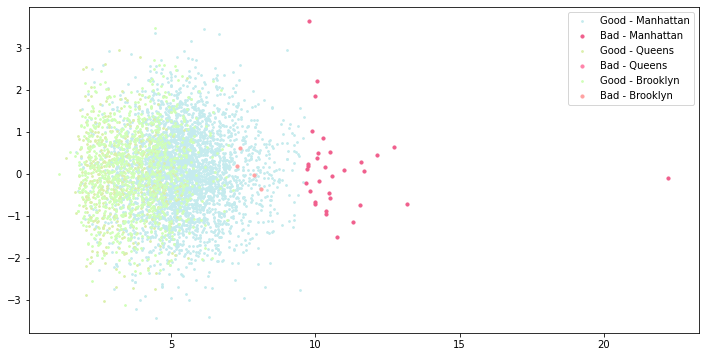

In [4]:
from scipy.stats import norm

mn = df[df['borough']=='Manhattan']
qs = df[df['borough']=='Queens']
bk = df[df['borough']=='Brooklyn']

threshold = 3
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
print('\n')

# Manhattan
mn_mean, mn_std = np.mean(mn['rent_per_sqft']), np.std(mn['rent_per_sqft'])
mn_z_score = np.abs((mn['rent_per_sqft'] - mn_mean) / mn_std)
mn_good = mn_z_score < threshold

print(f"Rejecting {(~mn_good).sum()} points in Manhattan")

# Queens
qs_mean, qs_std = np.mean(qs['rent_per_sqft']), np.std(qs['rent_per_sqft'])
qs_z_score = np.abs((qs['rent_per_sqft'] - qs_mean) / qs_std)
qs_good = qs_z_score < threshold

print(f"Rejecting {(~qs_good).sum()} points in Queens")

# Brooklyn
bk_mean, bk_std = np.mean(bk['rent_per_sqft']), np.std(bk['rent_per_sqft'])
bk_z_score = np.abs((bk['rent_per_sqft'] - bk_mean) / bk_std)
bk_good = bk_z_score < threshold

print(f"Rejecting {(~bk_good).sum()} points in Brooklyn")



# plot the data points
fig = plt.figure(figsize=(12,6))

# Manhattan 
mn_visual_scatter = np.random.normal(size=mn['rent_per_sqft'].size)
plt.scatter(mn['rent_per_sqft'][mn_good], mn_visual_scatter[mn_good], s=3, label="Good - Manhattan", c="#c5ebee")
plt.scatter(mn['rent_per_sqft'][~mn_good], mn_visual_scatter[~mn_good], s=10, label="Bad - Manhattan", c="#f05f8d")
# Queens
qs_visual_scatter = np.random.normal(size=qs['rent_per_sqft'].size)
plt.scatter(qs['rent_per_sqft'][qs_good], qs_visual_scatter[qs_good], s=3, label="Good - Queens", c="#dcf0ac")
plt.scatter(qs['rent_per_sqft'][~qs_good], qs_visual_scatter[~qs_good], s=10, label="Bad - Queens", c="#ff84aa")
# Brooklyn
bk_visual_scatter = np.random.normal(size=bk['rent_per_sqft'].size)
plt.scatter(bk['rent_per_sqft'][bk_good], bk_visual_scatter[bk_good], s=3, label="Good - Brooklyn", c="#d0ffb9")
plt.scatter(bk['rent_per_sqft'][~bk_good], bk_visual_scatter[~bk_good], s=10, label="Bad - Brooklyn", c="#ffa2a2")

plt.legend();

In [5]:
# start using a new dataframe

df1 = pd.concat([mn[mn_good], qs[qs_good], bk[bk_good]])
df1.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_per_sqft
count,4964.000000,4.964000e+03,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,5539.101732,5.121064e+07,4489.551974,1.394843,1.319500,919.083400,5.082595,10.154311,52.108582,0.431305,0.128727,0.132756,0.228042,0.239726,0.155318,0.045528,0.143433,4.879800
std,3262.158790,2.802020e+07,2847.217367,0.961752,0.564814,439.065617,5.255283,10.519283,40.178632,0.495308,0.334931,0.339345,0.419612,0.426959,0.362244,0.208480,0.350549,1.478513
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120000
25%,2716.750000,2.699811e+07,2750.000000,1.000000,1.000000,632.750000,2.000000,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.869752
50%,5467.000000,5.062689e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.916667
75%,8317.500000,7.572064e+07,5150.000000,2.000000,2.000000,1086.000000,6.000000,14.000000,89.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.807152
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.607438


# EDA
**Inspect bedrooms**

There are quite a few apartments don't have a bedroom, meaning they're likely stuidos.

In [6]:
len(df1['bedrooms'][df1['bedrooms']==0])

827

**Inspect bathrooms**

As shown above, 75% of the apartments have 2 or less bathrooms.



In [7]:
print('3 bathrooms: {}'.format(df1[df1['bathrooms']>2].shape))
print('4 bathrooms: {}'.format(df1[df1['bathrooms']>3].shape))
print('5 bathrooms: {}'.format(df1[df1['bathrooms']>4].shape))

3 bathrooms: (196, 21)
4 bathrooms: (16, 21)
5 bathrooms: (2, 21)


The only 2 apartments having 5 bathrooms are both in Upper East Side with 4 bedrooms each.

In [8]:
df1[df1['bathrooms']>4]

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,rent_per_sqft
446,7158,14686975,14500,4.0,5,2700,8,30.0,18,1,1,1,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,5.37037
3049,5433,33299325,18900,4.0,5,2617,43,8.0,8,1,0,0,1,1,0,0,1,Upper West Side,All Upper West Side,Manhattan,7.22201


**Inspect boolean columns**

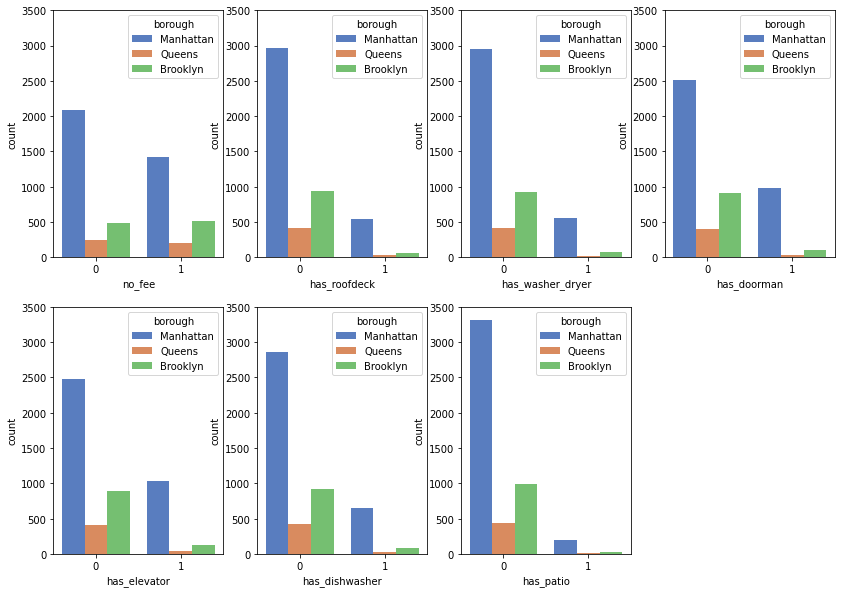

In [9]:
bool_cols = ['no_fee','has_roofdeck','has_washer_dryer','has_doorman', 'has_elevator','has_dishwasher','has_patio','has_gym']

fig = plt.figure(figsize=(14,10))

for sp in range(0,7):
    ax = fig.add_subplot(2,4,sp+1)
    ax = sns.countplot(x=bool_cols[sp], hue="borough", data=df1, ax=ax, palette='muted')
    ax.set(ylim=(0,3500))
    
plt.show()

**Inspect the relationships between neighborhoods and continuous variables**

- Manhattan has the youngest buildings, and it may due to the fact that it's developing more rapidly.
- The rent for Manhattan is without a doube much higher than that of Brooklyn and Queens.
- On average, Brooklyn offers apartments that more slightly more spacious. 

In [10]:
con_cols = ['rent', 'size_sqft', 'rent_per_sqft', 'building_age_yrs']
pd.pivot_table(df1,index=['borough'], values=con_cols, aggfunc=np.median)

,building_age_yrs,rent,rent_per_sqft,size_sqft
borough,,,,
Brooklyn,77.0,3000,3.764706,845
Manhattan,39.0,3995,5.336617,800
Queens,53.5,2350,3.010062,787


**Rent difference in the 3 boroughs**

- The rent is Queens is the lowest with the least amount of outliers.
- Manhattan's rent has the widest range and the largest number of outliers.
- Alought Brooklyn's rent is closer to Queen's, its outliers are comparable with Manhattan's.

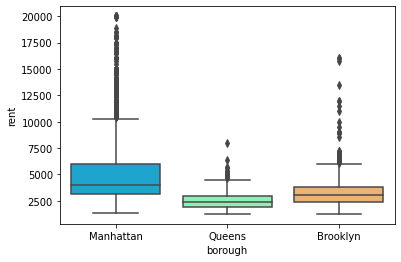

In [11]:
sns.boxplot(x="borough", y="rent", data=df1,palette='rainbow');

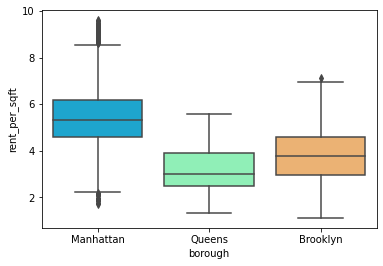

In [12]:
sns.boxplot(x="borough", y="rent_per_sqft", data=df1,palette='rainbow');

**Ranking Neighborhoods by rent_per_sqft and building_age_yrs**

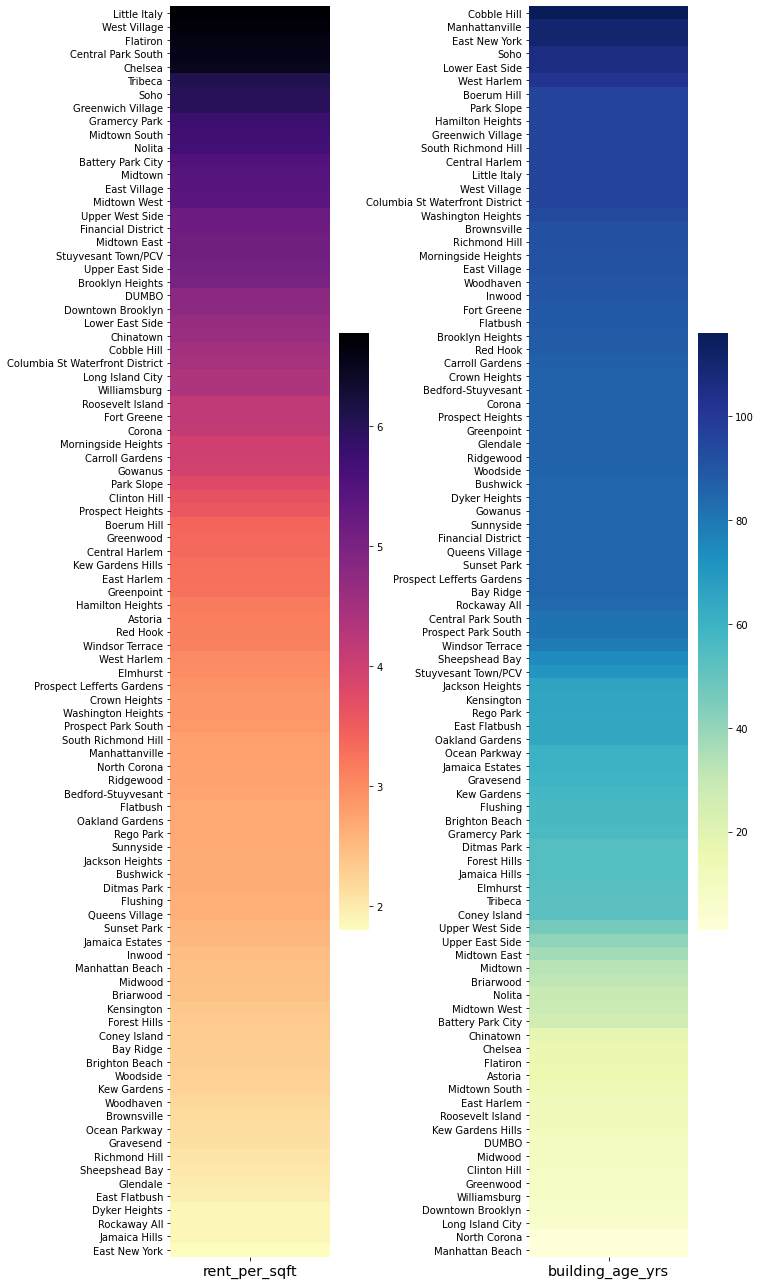

In [13]:
colors = ['magma_r', 'YlGnBu']
fig = plt.figure(figsize=(10, 23))

for sp in range(0,2):
  ax = fig.add_subplot(1,2,sp+1)
  table = pd.pivot_table(df1,index=['neighborhood'], values=con_cols[sp+2],aggfunc=np.median).sort_values(con_cols[sp+2], ascending=False)
  ax = sns.heatmap(table, cmap=colors[sp])
  ax.set(ylabel='')
  plt.xticks(size='x-large')


plt.subplots_adjust(wspace = 0.8) 
plt.show()

**rent vs. size_sqft**

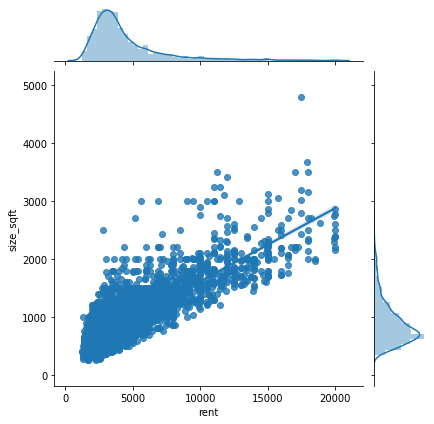

In [14]:
sns.jointplot(x='rent',y='size_sqft',data=df1,kind='reg');

**rent_per_sqft vs. building_age_yrs**

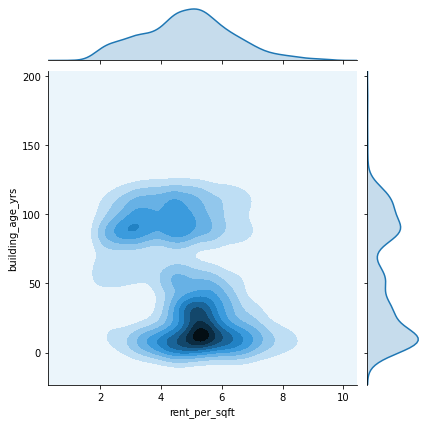

In [15]:
sns.jointplot(x='rent_per_sqft',y='building_age_yrs',data=df1,kind='kde');

# Machine Learning

## Prapare data

### 1. One hot encoding

In [66]:
print('Number of unique neighborhoods: ',len(df1.neighborhood.unique()))
print('Number of unique submarkets: ', len(df1.submarket.unique()))
print('Number of unique boroughs: ', (len(df1.borough.unique())))

Number of unique neighborhoods:  93
Number of unique submarkets:  15
Number of unique boroughs:  3


In [17]:
neighborhoods = pd.get_dummies(df1.neighborhood)
submarkets = pd.get_dummies(df1.submarket)
boroughs = pd.get_dummies(df1.borough)

submarkets.head(2)

,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side,Central Queens,East Brooklyn,North Brooklyn,Northeast Queens,Northwest Brooklyn,Northwest Queens,Prospect Park,South Brooklyn,South Queens,The Rockaways
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# starting to use a new dataframe

df2 = pd.concat([df1.drop(columns=['rental_id','building_id','neighborhood','submarket','borough']), neighborhoods, submarkets, boroughs],axis='columns')

print(df2.shape)
df2.head(2)

(4964, 127)


,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,rent_per_sqft,Astoria,Battery Park City,Bay Ridge,Bedford-Stuyvesant,Boerum Hill,Briarwood,Brighton Beach,Brooklyn Heights,Brownsville,Bushwick,Carroll Gardens,Central Harlem,Central Park South,Chelsea,Chinatown,Clinton Hill,Cobble Hill,Columbia St Waterfront District,Coney Island,Corona,Crown Heights,DUMBO,Ditmas Park,Downtown Brooklyn,...,Red Hook,Rego Park,Richmond Hill,Ridgewood,Rockaway All,Roosevelt Island,Sheepshead Bay,Soho,South Richmond Hill,Stuyvesant Town/PCV,Sunnyside,Sunset Park,Tribeca,Upper East Side,Upper West Side,Washington Heights,West Harlem,West Village,Williamsburg,Windsor Terrace,Woodhaven,Woodside,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side,Central Queens,East Brooklyn,North Brooklyn,Northeast Queens,Northwest Brooklyn,Northwest Queens,Prospect Park,South Brooklyn,South Queens,The Rockaways,Brooklyn,Manhattan,Queens
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,5.3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,5.7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 2. Data preprocessing

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor


X = df2.drop(columns=['rent', 'rent_per_sqft'])
y = df2.rent
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)


## Find the best model using GridSearchCV

This function is from @dhavalsays

https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb

In [20]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56341207.39242554, tolerance: 2271384.3635268807
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321395096.374717, tolerance: 2204373.6830280675
  positive)


,model,best_score,best_params
0,linear_regression,0.826917,{'normalize': False}
1,lasso,0.827753,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.741908,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Lasso Regression

Since Lasso Regression with alpha=1 and  'selection' =  'random' performs the best, we move on with this model.

In [21]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print('Trainning mean_squared_error: ',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('Training r2_score: ',r2_score(y_train, pred_train_lasso))
print('\n')

pred_test_lasso= model_lasso.predict(X_test)
print('Testing mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('Testing r2_score',r2_score(y_test, pred_test_lasso));

Trainning mean_squared_error:  1135.3976455682407
Training r2_score:  0.8371390697672301


Testing mean_squared_error 1244.0497547711427
Testing r2_score 0.8188134395031597


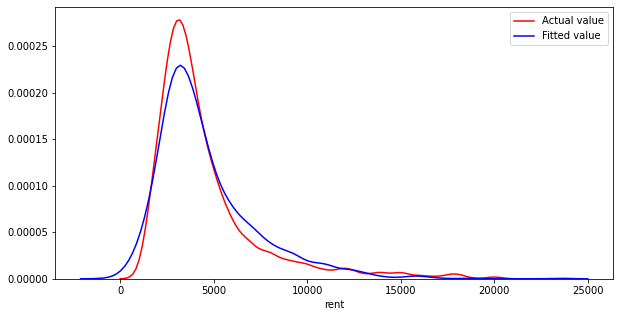

In [22]:
fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual value')
sns.distplot(pred_test_lasso, hist=False, color='b', label='Fitted value', ax=ax1)

plt.show()

# Answering Business Questions

## Does having a washer/dryer in unit increase the price of rent?

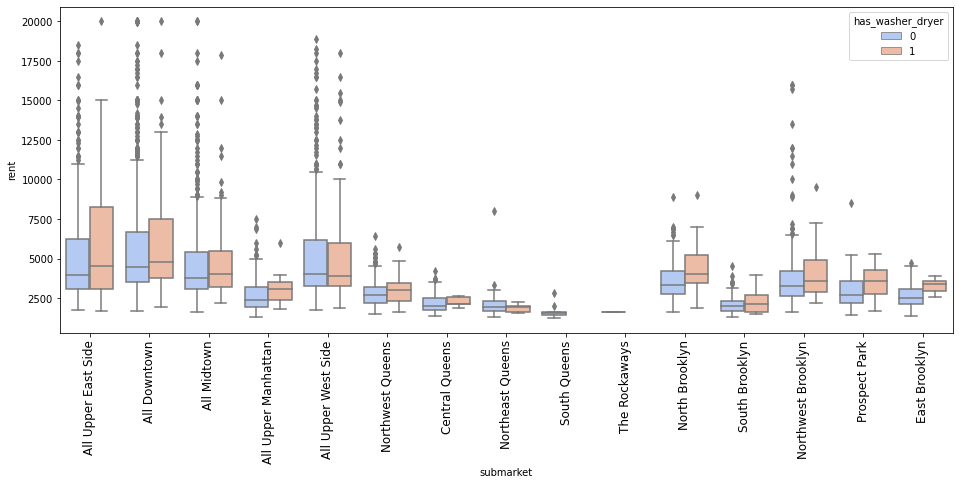

In [64]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(x="submarket", y="rent", hue='has_washer_dryer', data=df1, palette='coolwarm')
plt.xticks(rotation=90, size='large')

plt.show()

## How costly is living by a subway station in Brooklyn/Queens?

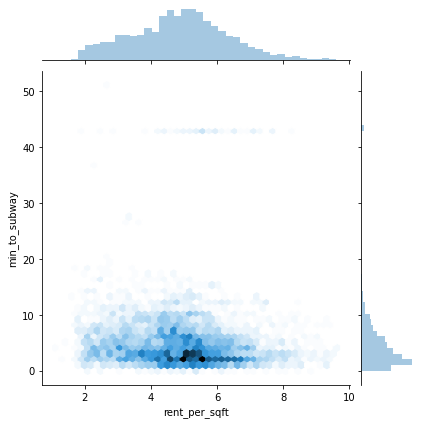

In [24]:
# 3 boroughs
sns.jointplot(x='rent_per_sqft', y='min_to_subway', data=df1, kind='hex');

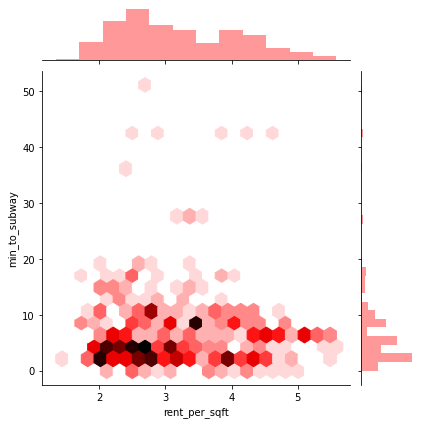

In [68]:
# Queens
sns.jointplot(x='rent_per_sqft', y='min_to_subway', data=df1[df1['borough']=='Queens'], kind='hex', color='r');


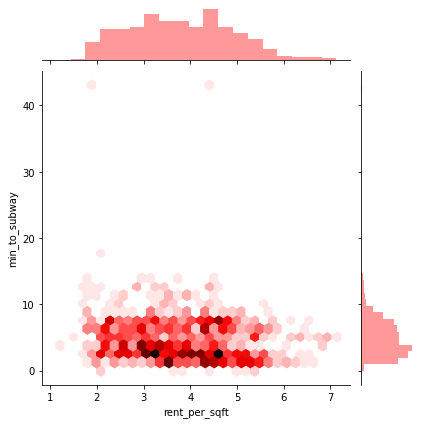

In [67]:
# Brooklyn
sns.jointplot(x='rent_per_sqft', y='min_to_subway', data=df1[df1['borough']=='Brooklyn'], kind='hex', color='r');

## Is a tenant over or underpaying?

In [0]:
def predict_price(neighborhood, submarket, borough, bedrooms, bathrooms, size_sqft, min_to_subway, floor, building_age_yrs, no_fee, has_roofdeck, has_washer_dryer, 
                  has_doorman, has_elevator, has_dishwasher, has_patio, has_gym):  


    neighborhood_index = np.where(X.columns==neighborhood)[0][0]
    submarket_index = np.where(X.columns==submarket)[0][0]
    borough_index = np.where(X.columns==borough)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = size_sqft
    x[3] = min_to_subway
    x[4] = floor
    x[5] = building_age_yrs
    x[6] = no_fee
    x[7] = has_roofdeck
    x[8] = has_washer_dryer
    x[9] = has_doorman
    x[10] = has_elevator
    x[11] = has_dishwasher
    x[12] = has_patio
    x[13] = has_gym

    if neighborhood_index >= 0:
        x[neighborhood_index] = 1
    
    if submarket_index >= 0:
        x[submarket_index] = 1
    
    if borough_index >= 0:
        x[borough_index] = 1
    


    return model_lasso.predict([x])[0]

In [28]:
# test the above function
predict_price('Upper East Side', 'All Upper East Side', 'Manhattan', 2, 3, 1000, 10, 0, 1, 0, 0, 1, 0, 1, 0, 0,1 )

6595.55911381059

**Location reference**

Please select your locations from the following 3 tables. Copy your chosen neighborhood, submarket, and borough.

In [61]:
# Manhattan
pd.pivot_table(df1[df1.borough=='Manhattan'],index=["submarket","neighborhood"],values=["rental_id"],aggfunc=[len])

len
                                        rental_id
submarket           neighborhood                 
All Downtown        Battery Park City         103
                    Chelsea                   180
                    Chinatown                   8
                    East Village              107
                    Financial District        267
                    Flatiron                  131
                    Gramercy Park              61
                    Greenwich Village          66
                    Little Italy                3
                    Lower East Side            41
                    Nolita                      9
                    Soho                       51
                    Stuyvesant Town/PCV         3
                    Tribeca                   119
                    West Village               65
All Midtown         Central Park South         22
                    Midtown                   115
                    Midtown East              457
                    Midtown South              85
                    Midtown West              314
All Upper East Side Roosevelt Island            5
                    Upper East Side           496
All Upper Manhattan Central Harlem             82
                    East Harlem                41
                    Hamilton Heights           16
                    Inwood                     12
                    Manhattanville              1
                    Morningside Heights        13
                    Washington Heights         54
                    West Harlem                 2
All Upper West Side Upper West Side           574
Northwest Queens    Long Island City            4

In [62]:
# Queens
pd.pivot_table(df1[df1.borough=='Queens'],index=["submarket","neighborhood"],values=["rental_id"],aggfunc=[len])

len
                                     rental_id
submarket        neighborhood                 
Central Queens   Corona                      1
                 Elmhurst                    7
                 Forest Hills               40
                 Glendale                    1
                 Jackson Heights             8
                 North Corona                1
                 Rego Park                  40
                 Ridgewood                  19
                 Woodside                    4
Northeast Queens Briarwood                   8
                 Flushing                   19
                 Kew Gardens                20
                 Kew Gardens Hills           4
                 Oakland Gardens             1
Northwest Queens Astoria                   132
                 Long Island City          100
                 Sunnyside                  29
South Queens     Jamaica Estates             6
                 Jamaica Hills               1
                 Queens Village              3
                 Richmond Hill               1
                 South Richmond Hill         1
                 Woodhaven                   1
The Rockaways    Rockaway All                1

In [63]:
# Brooklyn
pd.pivot_table(df1[df1.borough=='Brooklyn'],index=["submarket","neighborhood"],values=["rental_id"],aggfunc=[len])

len
                                                   rental_id
submarket          neighborhood                             
East Brooklyn      Bedford-Stuyvesant                     53
                   Brownsville                             3
                   Bushwick                               53
                   Crown Heights                          45
                   East New York                           1
North Brooklyn     Greenpoint                             41
                   Williamsburg                          305
Northwest Brooklyn Boerum Hill                            15
                   Brooklyn Heights                       34
                   Carroll Gardens                        26
                   Clinton Hill                           34
                   Cobble Hill                            13
                   Columbia St Waterfront District         3
                   DUMBO                                  49
                   Downtown Brooklyn                      96
                   Fort Greene                            27
                   Gowanus                                 6
                   Red Hook                                5
Prospect Park      Park Slope                             43
                   Prospect Heights                       12
                   Prospect Lefferts Gardens               7
                   Prospect Park South                    11
                   Windsor Terrace                         8
South Brooklyn     Bay Ridge                              15
                   Brighton Beach                         16
                   Coney Island                           11
                   Ditmas Park                             5
                   Dyker Heights                           1
                   East Flatbush                           4
                   Flatbush                               13
                   Gravesend                              11
                   Greenwood                              11
                   Kensington                              9
                   Manhattan Beach                         2
                   Midwood                                 1
                   Ocean Parkway                           6
                   Sheepshead Bay                          9
                   Sunset Park                             5

**Data input**

Please input data in the following 2 blocks to predict the apartment rent.

In [50]:
# please paste your copied locations here:

i_neighborhood = str(input('Which neighborhood? '))
i_submarket = str(input('Which submarket? '))
i_borough = str(input('Which borough? '))

Which neighborhood?Upper East Side
Which submarket?All Upper East Side
Which borough?Manhattan


In [42]:
# please input integers here

bed = int(input('Number of bedrooms (for studio please input 0): '))
bath = int(input('Number of bathrooms: '))
size = int(input('Square Feet: '))
subway = int(input('Minute to subway:'))
floor = int(input('Floor number: '))
age = int(input('Building age in years: '))
fee = int(input('Does it require broker fee? Input 0 for no, 1 for yes: '))
roofdeck = int(input('Does it have a roofdeck? Input 0 for no, 1 for yes: '))
washer_dryer = int(input('Does it have an in-unit washer/dryer? Input 0 for no, 1 for yes: '))
doorman = int(input('Does it have a doorman? Input 0 for no, 1 for yes: '))
elevator = int(input('Does it have an elevator? Input 0 for no, 1 for yes: '))
dishwasher = int(input('Does it have a dishwasher? Input 0 for no, 1 for yes: '))
patio = int(input('Does it have a patio? Input 0 for no, 1 for yes: '))
gym = int(input('Does it have a gym? Input 0 for no, 1 for yes: '))

Number of bedrooms (for studio please input 0): 3


In [0]:
# please run this block of code to get the predicted result

predict_price(i_neighborhood, i_submarket, i_borough, bed, bath, size, subway, floor, age, fee, roofdeck, washer_dryer, 
                  doorman, elevator, dishwasher, patio, gym)